# Curve Fitting with Numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Fit

Given the data
  
$ x = [1.0, 2.3, 3.1, 4.8, 5.6, 6.3] $  
$ y = [2.6, 2.8, 3.1, 4.7, 5.1, 5.3] $
  
Write a Python code to fit a linear function $y = mx + c$ against those data points. Print the best-fit values of the parameters $m$ and $c$. Plot the data points and your best-fit function using matplotlib.

In [3]:
x = np.array([1.0, 2.3, 3.1, 4.8, 5.6, 6.3])
y = np.array([2.6, 2.8, 3.1, 4.7, 5.1, 5.3])

In [4]:
#fitting a linear function y = mx + c against given data points
coeffs = np.polyfit(x, y, 1)
m, c = coeffs
print(f"Slope: {m}")
print(f"Intercept: {c}")
print(f"Function: y = {m}x + {c}")

Slope: 0.5841842792685824
Intercept: 1.6842238581492908
Function: y = 0.5841842792685824x + 1.6842238581492908


In [5]:
p = np.poly1d(coeffs)
yfit = p(x)

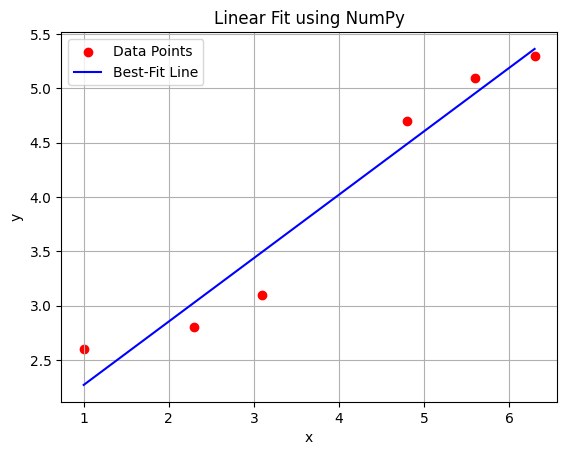

In [6]:
#plotting data points
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, yfit, color='blue', label='Best-Fit Line')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Fit using NumPy")
plt.legend()
plt.grid(True)
plt.show()

## Polynomial Fit

A projectile's height ($h$ in meters) was recorded at different times(t in seconds): 

$ t: [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]  $  
  
$ h: [0, 12.1, 19.5, 24.2, 25.0, 22.1, 15.5, 7.2, 0] $  

Use numpy.polyfit to fit a quadratic function to this data $(h = at² + bt + c)$. Plot the data points and fitted curve.

In [7]:
t = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
h = np.array([0, 12.1, 19.5, 24.2, 25.0, 22.1, 15.5, 7.2, 0])

In [8]:
fit = np.polyfit(t, h, 2) 
a, b, c = fit
print(a, b, c)
print(f"h = {fit[0]:.4f}t**2 + {fit[1]:.4f}t + {fit[2]:.4f}")

-6.199134199134204 23.96987012987015 1.1442424242423879
h = -6.1991t**2 + 23.9699t + 1.1442


In [9]:
tcurve = np.linspace(min(t), max(t), 1000)
hcurve = a * tcurve ** 2 + b * tcurve + c 

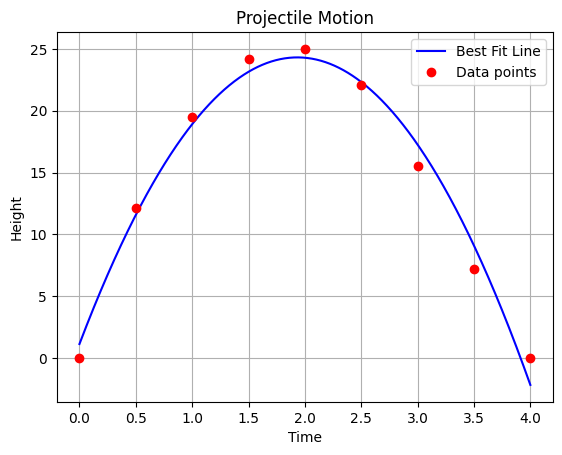

In [10]:
plt.plot(tcurve, hcurve, 'b-', label = 'Best Fit Line')
plt.plot(t, h, 'ro', label='Data points')
plt.title("Projectile Motion")
plt.xlabel("Time")
plt.ylabel("Height")
plt.legend()
plt.grid(True)
plt.show()

## Power Law

The pressure of a gas p and its volume v are related by an equation of the type $pv^γ = c$, where $γ$ and $c$ are constants. In an experiment the pressure of a certain mass of gas was kept fixed at certain levels and the corresponding volumes of the gas were measured. The results are tabulated below.  
  
$p = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0] $  
  
$v = [1.63, 0.99, 0.74, 0.64, 0.53, 0.45] $  
  
Determine the value of γ and c by using numpy's polyfit. Plot the fitted curve along with data points using matplotlib. Set the appropriate legend at suitable location for fitted curve and data points. 

In [11]:
p = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
v = np.array([1.63, 0.99, 0.74, 0.64, 0.53, 0.45])

For the equation $pv^{\gamma} = c$, taking logarithm on both sides:
$\log(p) + \gamma\log(v) = \log(c)$

Rearranging for a linear relationship:
$\log(v) = -\frac{1}{\gamma} \log(p) + \frac{\log(c)}{\gamma}$

This gives a straight line when plotting $\log(v)$ vs $\log(p)$ with slope $= -\frac{1}{\gamma}$

In [12]:
logp = np.log(p)
logv = np.log(v)

fit2 = np.polyfit(logp, logv, 1)
print(fit2)

[-7.02530726e-01 -3.10917922e-04]


In [13]:
gamma = -1 / fit2[0]
logc = gamma * fit2[1]
c = np.exp(logc)
print(f"gamma = {gamma:.4f}")
print(f"c = {c:.4f}")

gamma = 1.4234
c = 0.9996


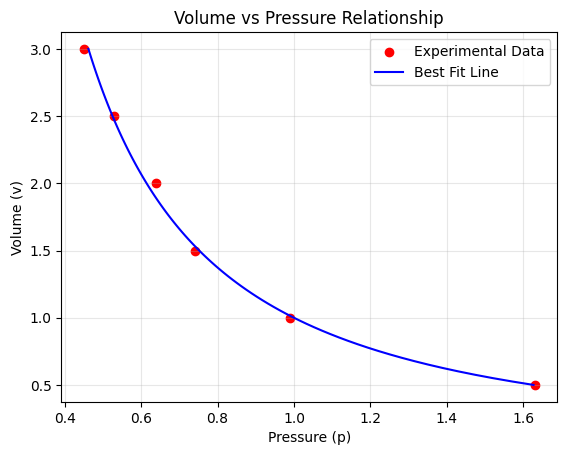

In [14]:
plt.scatter(v, p, color='red', marker='o', label='Experimental Data')
pcurve = np.linspace(min(p), max(p), 100)
vcurve = (c / pcurve)**(1/gamma)
plt.plot(vcurve, pcurve, color='blue', label='Best Fit Line')
plt.title('Volume vs Pressure Relationship')
plt.xlabel('Pressure (p)')
plt.ylabel('Volume (v)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
